# CASE OF FIRST ORDER PLANT

$$\tau\dfrac{dy}{dt}+y(t) \;=\; k\times u(t),\qquad\text{where: y(t=0) = 0}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import step

In [2]:
                  #########################
k, tau = 2.0, 0.5 # SIMULATION'S SETTINGS #
                  #########################

**Numeric Integration: ODE**

In [3]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
def mySys(x, t):
	u = 1
	return 1/0.5*(-x + 2*u)

In [4]:
from scipy.integrate import odeint

In [5]:
tspan = np.linspace(0.0, 7.0, 100)
y1 = odeint(mySys, 0, tspan)

**Transfer Function**

In [6]:
from scipy.signal import TransferFunction as tf

In [7]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
hTF = tf([k], [tau, 1])
_, y2 = step(hTF, T=tspan)

**State Space**

In [8]:
from scipy.signal import StateSpace as ss

In [9]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
A, B, C, D = -1/tau, k/tau, 1, 0
hSS = ss(A, B, C, D)
_, y3 = step(hSS, T=tspan)

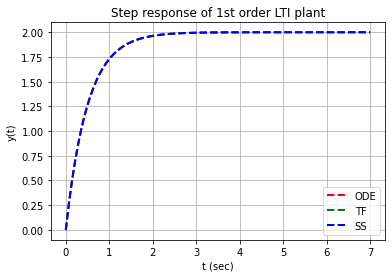

In [10]:
plt.plot(tspan, y1, 'r--', linewidth=2, label='ODE')
plt.plot(tspan, y2, 'g--', linewidth=2, label='TF')
plt.plot(tspan, y3, 'b--', linewidth=2, label='SS')

plt.title('Step response of 1st order LTI plant')
plt.xlabel('t (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='best')
plt.show()

# CASE OF SECOND ORDER PLANT

$$\dfrac{d^2y}{dt^2}+2\times m\times \omega_0\dfrac{dy}{dt}+\omega_{0}^{2} y(t) \;=\; k\omega_{0}^{2} u(t),\qquad\text{where: }y(0)=0 \;\&\; \dot{y}(0)=0$$

In [11]:
                    #########################
k, m, o = 1, 1, 1.5 # SIMULATION'S SETTINGS #
                    #########################

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import step

**Numeric Integration: ODE**

In [13]:
def mySys(x, t):
	u = 1
	dotx = [x[1], -o**2*x[0]-2*m*o*x[1] + k*o**2*u]
	return dotx

In [14]:
from scipy.integrate import odeint

In [15]:
tspan = np.linspace(0.0, 10.0, 100)
vect = odeint(mySys, [0, 0], tspan)
y1 = vect[:, 0]

**Transfer Function**

In [16]:
from scipy.signal import TransferFunction as tf

In [17]:
hTF = tf([k*o**2], [1, 2*m*o, o**2])
_, y2 = step(hTF, T=tspan)

**State Space**

In [18]:
from scipy.signal import StateSpace as ss

In [19]:
A = np.array([[0, 1], [-o**2, -2*m*o]])
B = np.array([[0], [k*o**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

hSS = ss(A, B, C, D)
_, y3 = step(hSS, T=tspan)

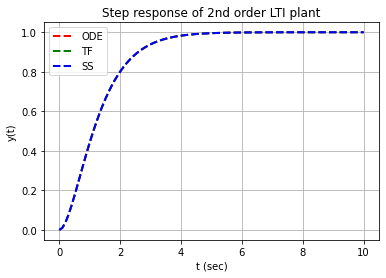

In [20]:
plt.plot(tspan, y1, 'r--', linewidth=2, label='ODE')
plt.plot(tspan, y2, 'g--', linewidth=2, label='TF')
plt.plot(tspan, y3, 'b--', linewidth=2, label='SS')

plt.title('Step response of 2nd order LTI plant')
plt.xlabel('t (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='best')
plt.show()